[View in Colaboratory](https://colab.research.google.com/github/mahedjaved/tutorial-rep/blob/master/1_GettingStarted_EagerExec.ipynb)

# Chapter 1 - Getting Start - Exec

* Currently many APIs in tensorflow
* EagerExec is the easiest high level API in TF

In [0]:
#!pip install -q --upgrade tensorflow
#!pip freez
#!pip install mxnet
#!pip uninstall tf-nightly 

### Basic Guid for Eager Execution

* Eager execution enables tensorflow to turn off **computational graph mode** and begin with imperative execution

---
Begin by importing libraries


In [1]:
from __future__ import absolute_import, division, print_function

import os
currDir=os.getcwd()
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf
import tensorflow.contrib.eager as tfe

tf.enable_eager_execution()

print("TensorFlow version: {}".format(tf.VERSION))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 1.7.0
Eager execution: True


### Iris Classifier

* A more modest approach to classifying flowers
* Mostly based on sizes
* Will only classify 3 species
    * Iris setosa
    * Iris virginica
    * Iris versicolor

#### 1. Download the dataset

In [2]:

train_dataset_url = "http://download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))


Local copy of the dataset file: /content/.keras/datasets/iris_training.csv


#### 2. Inspect the dataset

* The '-n5' command takes a peak at only the first five entries

In [3]:
!head -n5 {train_dataset_fp}

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0


* The first line contains header information e.g. 120 points to the size of the dataset 
* The following rows capture features
* E.g. the first four columns capture the measurements of the flower
* The last layer captures the category type defining the name of the flower

#### 3. Parsing dataset 

* Parsing allows dataset to be readable for python from CSV format
* Each row of the .csv file is passed into the function "parse_csv" as an argument
* Finally the last field is parsed as a label {field=column}
* The function "parse_csv" combines fields into a single tensor := each column is recorded as a single tensor
* And it returns both "features" and "labels"

In [0]:
def parse_csv(line):
  example_defaults=[[0.], [0.], [0.], [0.], [0.]]
  parsed_line=tf.decode_csv(line, example_defaults)
  # first 4 fields are features, combined into single tensor
  features=tf.reshape(parsed_line[:-1], shape=(4,))
  # set last field as label
  label=tf.reshape(parsed_line[:-1], shape=())
  return features, label

#### 4. Create training data using tf.data API

* The function 'tf.data.TextLineDataset' is used to laod a CSV formatted text file
* This file is then parsed by the function "parse_csv"
* Ideally data storage within the Dataset API is usualkly stored in a sequential formatsuch that ordering is not required
* However, training works best if the data is ordered randomly
  * -> Which is where the function tf.data.Data.shuffle comes in to play
* Furthermore we also have batch size to help us train faster

In [0]:
train_dataset=tf.data.TextLineDataset(train_dataset_fp)
# using skip to 'skip' lol the first row which is not capturing any 
# detail on the labels
train_dataset=train_dataset.skip(1)   

---
# Code for adding occlusions

In [0]:
import numpy as np


def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

# Code for Brightness and Contrast Change

In [0]:
import cv2 as cv
import numpy as np

# Open a typical 24 bit color image. For this kind of image there are
# 8 bits (0 to 255) per color channel
img = cv.imread('mandrill.png')  # mandrill reference image from USC SIPI

# Convert to signed 16 bit. this will allow values less than zero and
# greater than 255
img = np.int16(img)  

contrast   = 64
brightness = 0

img = img*(contrast/127 + 1) - contrast + brightness

# we now have an image that has been adjusted for brightness and
# contrast, but we need to clip values not in the range 0 to 255
img = np.clip(img, 0, 255)  # force all values to be between 0 and 255

# finally, convert image back to unsigned 8 bit integer
img = np.uint8(img)

cv.imwrite('mandrill_contrast64.png', img)

### Import random image

##### import the image

In [0]:
from skimage import io
import cv2

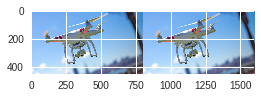

In [25]:
plt.figure(figsize=(4,4))
image = io.imread('https://i.kinja-img.com/gawker-media/image/upload/c_scale,f_auto,fl_progressive,q_80,w_800/1372352376357615394.jpg')
# change to BGR for cv2
cv2Image=cv2.cvtColor(image, cv2.COLOR_RGB2BGR)[:,:,(2,1,0)]
plt.imshow(np.hstack((image, cv2Image)))

---